In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 25.2 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Load the data
df1 = pd.read_excel('Year1.xlsx')
df2 = pd.read_excel('Year2.xlsx')
df3 = pd.read_excel('Year3.xlsx')
df4 = pd.read_excel('Year4.xlsx')
response = pd.read_csv('train-Copy1.csv')

In [ ]:
response = response[['gpa','grit','materialHardship', 'eviction', 'layoff', 'jobTraining']]

In [ ]:
response

,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.50,0.090909,0.0,0.0,0.0
3,2.50,3.25,0.000000,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2116,NaN,NaN,NaN,NaN,NaN,NaN
2117,NaN,3.75,0.000000,0.0,0.0,0.0
2118,2.75,2.75,0.000000,0.0,0.0,0.0
2119,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
knn.fit(response)
response = knn.transform(response)

In [ ]:
response = response[:,1]

In [ ]:
response = pd.DataFrame(response)

In [ ]:
# Merge the data frames into one
df = pd.concat([df1, df2, df3, df4], axis=1)

In [ ]:
df = df.drop(columns= "Unnamed: 0")

In [ ]:
df

,f4k1,f4h1f,f4e10,f4k25a,m4k25a,cm4edu,cf4edu,f3k1,f3h1f,f3e10,...,m4k25a,cm4edu,cf4edu,f5i1,f5e1f,f5d10,f5i25a,m5i25a,cm5edu,cf5edu
0,1,0,0,-1,-1,3,3,1,0,0,...,-1,3,3,1,0,0,-1,-1,3,3
1,-1,3,0,-1,-1,1,1,0,0,0,...,-1,1,1,-1,0,0,-1,-1,1,1
2,1,0,-1,-1,-1,3,3,1,0,0,...,-1,3,3,-1,0,0,-1,0,0,3
3,-1,0,0,-1,-1,2,3,-1,0,0,...,-1,2,3,-1,0,0,-1,-1,2,3
4,0,0,0,0,-1,2,0,0,0,0,...,-1,2,0,0,0,0,0,-1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-1,0,0,-1,-1,1,1,-1,0,0,...,-1,1,1,-1,0,0,-1,-1,1,1
4894,-1,0,0,-1,-1,2,2,1,0,0,...,-1,2,2,-1,0,0,-1,-1,2,2
4895,-1,0,-1,-1,-1,2,3,1,0,0,...,-1,2,3,0,0,0,0,-1,2,0
4896,1,0,-1,-1,-1,2,3,1,0,-1,...,-1,2,3,1,0,0,-1,-1,2,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[response.index] , response, test_size=0.33, random_state=42)

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X_train.values.reshape((X_train.shape[0], 4, 7)), y_train, epochs=50, batch_size=32, validation_data=(X_test.values.reshape((X_test.shape[0], 4, 7)), y_test))

mse = model.evaluate(X_test.values.reshape(X_test.shape[0],4,7), y_test)
print(mse)

Epoch 1/50
45/45 [==============================] - 2s 8ms/step - loss: 2.2149 - val_loss: 0.6759
Epoch 2/50
45/45 [==============================] - 0s 4ms/step - loss: 0.3926 - val_loss: 0.2558
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 0.2256 - val_loss: 0.1893
Epoch 4/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1878 - val_loss: 0.1757
Epoch 5/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1862 - val_loss: 0.1778
Epoch 6/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1738 - val_loss: 0.1774
Epoch 7/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1701 - val_loss: 0.1762
Epoch 8/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1776 - val_loss: 0.1640
Epoch 9/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1742 - val_loss: 0.1643
Epoch 10/50
45/45 [==============================] - 0s 4ms/step - loss: 0.1759 - val_loss: 0.1684
Epoch 11/50
45/45 [

In [ ]:
features = [i for i in range(29)]

In [ ]:
len(X_train)

1421

  0%|          | 0/30 [00:00<?, ?it/s]

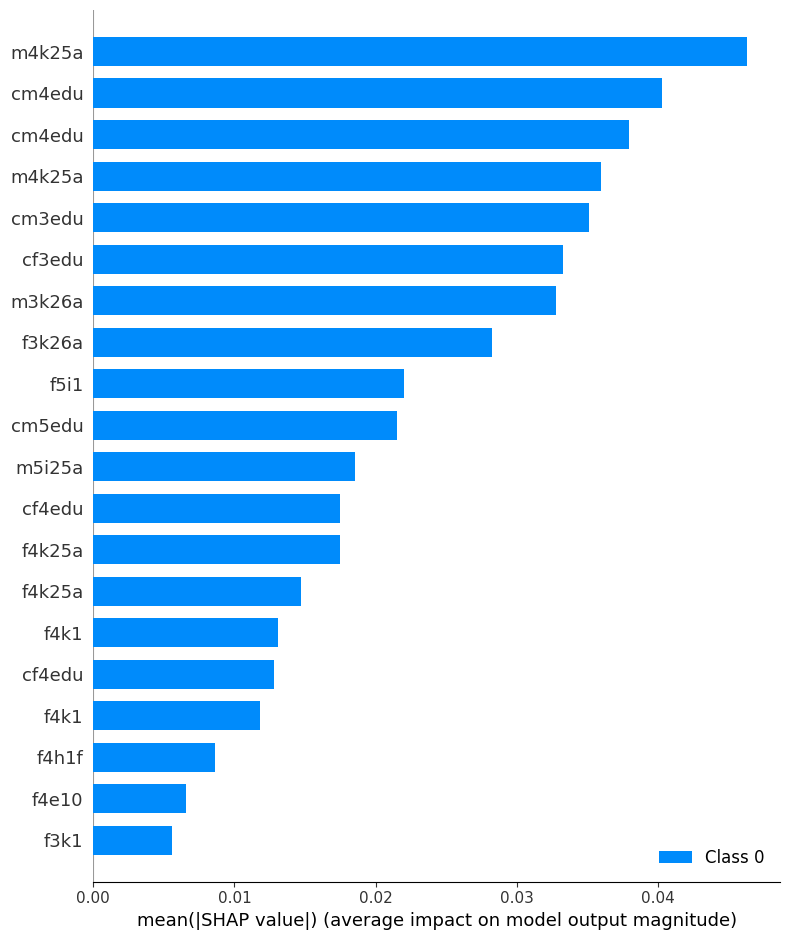

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


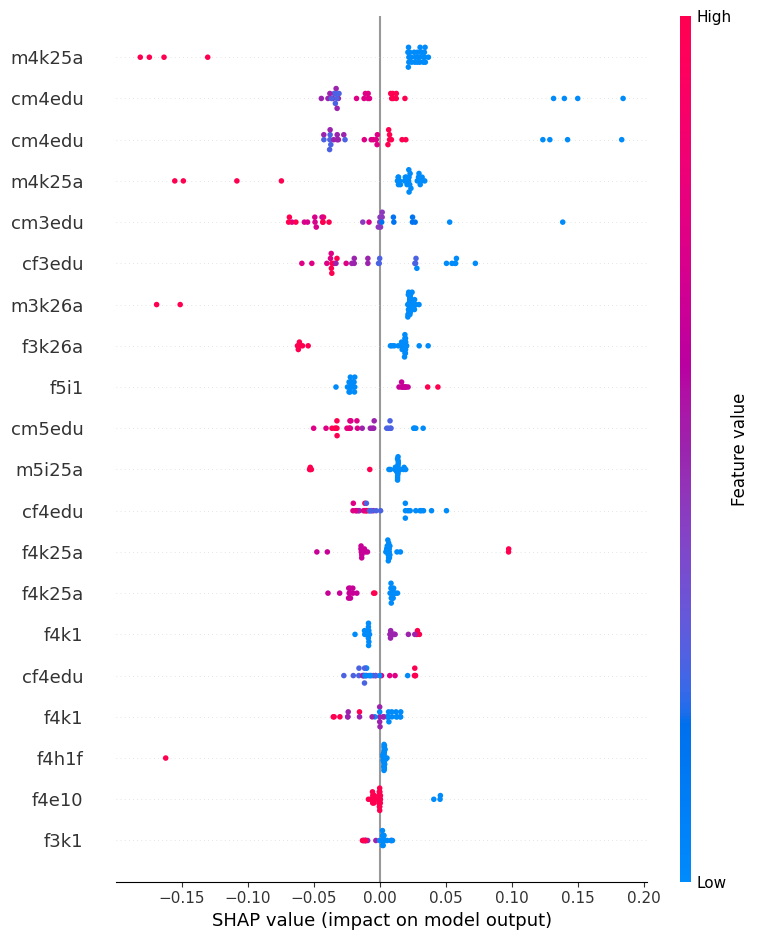

In [ ]:
X_train_shap = shap.sample(X_train, 100)
X_test_shap = shap.sample(X_test,30)

e = shap.KernelExplainer(model, X_train_shap)
shap_values = e.shap_values(X_test_shap)
# Summary plot
shap.summary_plot(shap_values, X_test_shap)
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.force_plot(e.expected_value[0], shap_values[0][0], features = X_train.columns)
shap.summary_plot(shap_values[0], X_test_shap, feature_names=X_train.columns)

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=978c4d5433d8954dc550cdc44c8422cc3cabca3ed664705203ecdc90c2b3154e
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# Create a LimeTabularExplainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, mode='regression')

# Get the LIME explanations for a test instance
exp = explainer.explain_instance(X_test.iloc[0], model.predict, num_features=X_test.shape[1])

# Print the LIME feature importances for the test instance
print(exp.as_list())


157/157 [==============================] - 0s 1ms/step
[('f4h1f <= 0.00', 0.18498392529298183), ('cf3edu <= 0.00', 0.11492106601338394), ('f3e10 <= 0.00', -0.11442686740838638), ('f5d10 <= 0.00', 0.06516012053357154), ('f5e1f <= 0.00', -0.05067813364296403), ('f3h1f <= 0.00', -0.048049730475332876), ('1.00 < cm3edu <= 2.00', -0.04004818073926669), ('f4e10 <= 0.00', -0.03933322704725495), ('1.00 < cm4edu <= 2.00', -0.035973217566278276), ('1.00 < cm4edu <= 2.00', -0.03167611092940254), ('f4e10 <= 0.00', -0.02764095620452642), ('cf4edu <= 0.00', 0.02435103790973137), ('f4h1f <= 0.00', 0.01079560751596787), ('0.00 < cm5edu <= 2.00', 0.008020488051801063), ('m3k26a <= -1.00', 0.007684698288525536), ('-1.00 < f3k1 <= 0.00', 0.006393001284552421), ('f4k1 <= -1.00', 0.005788195611044723), ('m4k25a <= -1.00', -0.005439839942143034), ('f4k1 <= -1.00', -0.003992679062410493), ('1.00 < cf5edu <= 3.00', 0.0030802657585845402), ('-1.00 < f3k26a <= 0.00', -0.002778275637572466), ('m5i25a <= -1.00', 

In [ ]:
lis = [i for i in exp.as_list()]

In [ ]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'f4h1f <= 0.00'),
  Text(1, 0, 'cf3edu <= 0.00'),
  Text(2, 0, 'f3e10 <= 0.00'),
  Text(3, 0, 'f5d10 <= 0.00'),
  Text(4, 0, 'f5e1f <= 0.00'),
  Text(5, 0, 'f3h1f <= 0.00'),
  Text(6, 0, '1.00 < cm3edu <= 2.00'),
  Text(7, 0, 'f4e10 <= 0.00'),
  Text(8, 0, '1.00 < cm4edu <= 2.00'),
  Text(9, 0, 'cf4edu <= 0.00'),
  Text(10, 0, '0.00 < cm5edu <= 2.00'),
  Text(11, 0, 'm3k26a <= -1.00'),
  Text(12, 0, '-1.00 < f3k1 <= 0.00'),
  Text(13, 0, 'f4k1 <= -1.00'),
  Text(14, 0, 'm4k25a <= -1.00'),
  Text(15, 0, '1.00 < cf5edu <= 3.00'),
  Text(16, 0, '-1.00 < f3k26a <= 0.00'),
  Text(17, 0, 'm5i25a <= -1.00'),
  Text(18, 0, 'f4k25a <= -1.00'),
  Text(19, 0, 'f5i25a <= -1.00'),
  Text(20, 0, 'f5i1 <= -1.00')])

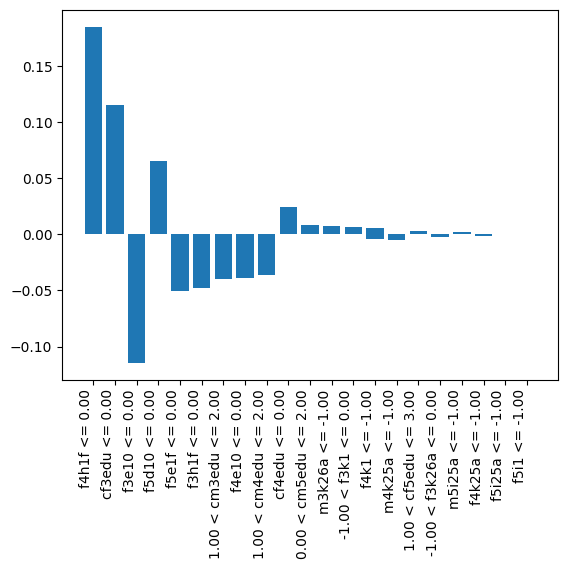

In [ ]:
X = [x[0] for x in lis]
Y = [y[1] for y in lis]
plt.bar(X,Y)
plt.xticks(rotation=90, ha='right')